In [2]:
import pandas as pd
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

In [3]:
#valhalla model, fastest
tokenizer = AutoTokenizer.from_pretrained("valhalla/distilbart-mnli-12-1")
model = AutoModelForSequenceClassification.from_pretrained("valhalla/distilbart-mnli-12-1", device = -1)

#bart-large model
""" BartTokenizer.from_pretrained('facebook/bart-large-mnli')
model = BartForSequenceClassification.from_pretrained('facebook/bart-large-mnli') """

" BartTokenizer.from_pretrained('facebook/bart-large-mnli')\nmodel = BartForSequenceClassification.from_pretrained('facebook/bart-large-mnli') "

In [4]:
try:
    classifier = pipeline("zero-shot-classification", model = model, tokenizer = tokenizer, device = -1) #classifier = pipeline(task='zero-shot-classification', model=model, tokenizer=tokenizer, framework='pt')
except RuntimeError:
    print("A runtime error occurred, check if tensorflow and pytorch are correctly installed, need to be version >= 2")

In [5]:
df_original  = pd.read_csv(r'copy.csv')

In [6]:
# Dataprocessing should be inputted here, see Clara's code
df_name = df_original.head(40)

In [11]:
candidate_labels = ['racist', 'sexist', 'hatespeech', 'neutral', 'offensive']
candidate_results = [0, 0, 0, 0, 0]

for sent in tqdm(df_name['tweet'].values):
        
    res = classifier(sent, candidate_labels, multi_label = True) #change multiclass to True for different results

    if res['labels'][0] == 'racist' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'sexist' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'hatespeech' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'neutral' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'offensive' and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

  2%|▎         | 1/40 [00:01<00:45,  1.18s/it]

 rt : as a woman you shouldn't complain about cleaning up your house
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.9784378409385681, 0.8979240655899048, 0.0648459866642952, 0.052967578172683716, 0.0029014074243605137]




  5%|▌         | 2/40 [00:02<00:36,  1.03it/s]

 rt : boy dats cold
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.7940925359725952, 0.7763931155204773, 0.13457690179347992, 0.0533047616481781, 0.00312512693926692]




  8%|▊         | 3/40 [00:03<00:46,  1.25s/it]

 rt  dawg rt : you ever fuck a bitch and she start to cry? you be confused as shit
['offensive', 'sexist', 'racist', 'hatespeech', 'neutral']
[0.9513855576515198, 0.776006281375885, 0.1819409281015396, 0.14068084955215454, 0.00036044884473085403]




 10%|█         | 4/40 [00:04<00:44,  1.23s/it]

 rt _g_anderson: _based she look like a tranny
['offensive', 'racist', 'sexist', 'hatespeech', 'neutral']
[0.9256668090820312, 0.7491874098777771, 0.740682065486908, 0.06922344118356705, 0.0018300164956599474]




 15%|█▌        | 6/40 [00:07<00:43,  1.29s/it]

"_madison_x: the shit just blows me
['offensive', 'racist', 'hatespeech', 'sexist', 'neutral']
[0.9982762336730957, 0.3076462745666504, 0.27149006724357605, 0.21893034875392914, 0.00011896310024894774]




 18%|█▊        | 7/40 [00:08<00:42,  1.30s/it]

"@__brighterdays: i can not just sit up and hate on another bitch 
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.949338436126709, 0.7977164387702942, 0.775252640247345, 0.2769066393375397, 0.0012614167062565684]




 20%|██        | 8/40 [00:10<00:41,  1.30s/it]

“: cause i'm tired of you big bitches coming for us skinny girls”
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.8603590726852417, 0.6774135231971741, 0.3200952410697937, 0.23865444958209991, 0.0011993367224931717]




 22%|██▎       | 9/40 [00:11<00:38,  1.23s/it]

" & you might not get ya bitch back & thats that "
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.6119954586029053, 0.5925929546356201, 0.4207615852355957, 0.15590155124664307, 0.0032551917247474194]




 25%|██▌       | 10/40 [00:12<00:36,  1.20s/it]

" _ :hobbies include: fighting mariam"

bitch
['offensive', 'sexist', 'racist', 'hatespeech', 'neutral']
[0.9162443280220032, 0.8869963884353638, 0.7999773621559143, 0.6022580862045288, 0.0003511799732223153]




 28%|██▊       | 11/40 [00:13<00:35,  1.23s/it]

" keeks is a bitch she curves everyone " lol i walked into a conversation like this
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.9705602526664734, 0.9377549886703491, 0.7810362577438354, 0.15758806467056274, 0.00040111676207743585]




 30%|███       | 12/40 [00:14<00:31,  1.12s/it]

" murda gang bitch its gang land "
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.9859157204627991, 0.8035455346107483, 0.6393623352050781, 0.3991800546646118, 0.00034155967296101153]




 32%|███▎      | 13/40 [00:15<00:29,  1.09s/it]

" so hoes that smoke are losers ? " yea 
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.8874859809875488, 0.8171079158782959, 0.5044309496879578, 0.33767449855804443, 0.005199314095079899]




 38%|███▊      | 15/40 [00:17<00:24,  1.01it/s]

" bitch get up off me "
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.9264683127403259, 0.8001973032951355, 0.7832137942314148, 0.2092466801404953, 0.003137946594506502]




 40%|████      | 16/40 [00:18<00:23,  1.04it/s]

" bitch nigga miss me with it "
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.9299280643463135, 0.8208025693893433, 0.8168356418609619, 0.7958343029022217, 0.0015841111307963729]




 42%|████▎     | 17/40 [00:19<00:20,  1.10it/s]

" bitch plz whatever "
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.800070583820343, 0.7356282472610474, 0.42850807309150696, 0.09877222031354904, 0.07198610156774521]




 45%|████▌     | 18/40 [00:19<00:19,  1.13it/s]

" bitch who do you love "
['sexist', 'offensive', 'racist', 'hatespeech', 'neutral']
[0.9356801509857178, 0.7418124079704285, 0.17884796857833862, 0.1618511974811554, 0.004994305782020092]




 48%|████▊     | 19/40 [00:20<00:18,  1.13it/s]

" bitches get cut off everyday b "
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.7679325938224792, 0.6037854552268982, 0.1347745954990387, 0.09304271638393402, 0.0019174672197550535]




 50%|█████     | 20/40 [00:21<00:17,  1.14it/s]

" black bottle & a bad bitch "
['racist', 'offensive', 'hatespeech', 'sexist', 'neutral']
[0.9499057531356812, 0.9192680716514587, 0.8598911762237549, 0.814226508140564, 0.00019474698638077825]




 52%|█████▎    | 21/40 [00:22<00:16,  1.14it/s]

" broke bitch cant tell me nothing "
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.7845158576965332, 0.38111481070518494, 0.24744568765163422, 0.14893276989459991, 0.001915152883157134]




 55%|█████▌    | 22/40 [00:23<00:15,  1.15it/s]

" cancel that bitch like nino "
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.9400047659873962, 0.72738116979599, 0.5943587422370911, 0.3110629618167877, 0.004568829201161861]




 57%|█████▊    | 23/40 [00:24<00:15,  1.11it/s]

" cant you see these hoes wont change "
['sexist', 'offensive', 'racist', 'hatespeech', 'neutral']
[0.7546282410621643, 0.36084505915641785, 0.15497706830501556, 0.13803628087043762, 0.0006224268581718206]




 60%|██████    | 24/40 [00:25<00:17,  1.09s/it]

" fuck no that bitch dont even suck dick " 😂😂😂 the kermit videos bout to fuck ig up
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.8541387915611267, 0.4033378064632416, 0.32280510663986206, 0.04978986084461212, 0.00023835439060349017]




 62%|██████▎   | 25/40 [00:27<00:16,  1.12s/it]

" got ya bitch tip toeing on my hardwood floors " 😂 
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.9266583919525146, 0.7865529656410217, 0.7689049243927002, 0.09525922685861588, 0.0010135445045307279]




 65%|██████▌   | 26/40 [00:28<00:14,  1.07s/it]

" her pussy lips like heaven doors " 😌
['sexist', 'offensive', 'racist', 'hatespeech', 'neutral']
[0.5785389542579651, 0.2642337381839752, 0.010179569013416767, 0.0026691623497754335, 0.001052725943736732]




 68%|██████▊   | 27/40 [00:28<00:13,  1.01s/it]

" hoe what its hitting for "
['offensive', 'sexist', 'racist', 'hatespeech', 'neutral']
[0.6102291941642761, 0.08840546756982803, 0.08763164281845093, 0.03682633489370346, 0.0036143208853900433]




 70%|███████   | 28/40 [00:29<00:11,  1.03it/s]

" i met that pussy on ocean dr 
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.7955021262168884, 0.7210569381713867, 0.5200067162513733, 0.06350692361593246, 0.0022078361362218857]




 72%|███████▎  | 29/40 [00:30<00:11,  1.02s/it]

" i need a trippy bitch who fuck on hennessy "
['sexist', 'offensive', 'racist', 'hatespeech', 'neutral']
[0.867834746837616, 0.39203548431396484, 0.13123466074466705, 0.08478087186813354, 0.0002429704909445718]




 75%|███████▌  | 30/40 [00:31<00:10,  1.02s/it]

" i spend my money how i want bitch its my business "
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.5342047810554504, 0.4580884575843811, 0.26805058121681213, 0.09080468118190765, 0.005414056126028299]




 78%|███████▊  | 31/40 [00:33<00:09,  1.05s/it]

" i txt my old bitch my new bitch pussy wetter "
['sexist', 'racist', 'offensive', 'hatespeech', 'neutral']
[0.9546530246734619, 0.3712116777896881, 0.3463810980319977, 0.05850548669695854, 0.0009718115325085819]




 80%|████████  | 32/40 [00:34<00:09,  1.14s/it]

" i'd say im back to the old me but my old bitches would get excited " 😌
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.6559138298034668, 0.08254069834947586, 0.03973618522286415, 0.020464641973376274, 0.010098380036652088]




 82%|████████▎ | 33/40 [00:35<00:07,  1.14s/it]

" if you aint bout that murder game pussy nigga shut up "
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.9515302777290344, 0.9364069700241089, 0.9145834445953369, 0.7794151306152344, 0.0006000306457281113]




 85%|████████▌ | 34/40 [00:36<00:06,  1.11s/it]

" if you're toes ain't done you pussy stinks "
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.963909924030304, 0.8639248013496399, 0.7078208923339844, 0.21395140886306763, 0.0017247844953089952]




 88%|████████▊ | 35/40 [00:37<00:05,  1.09s/it]

" im done with bitter bitches its a wrap for that 
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.7771784663200378, 0.6961096525192261, 0.18384265899658203, 0.020053353160619736, 0.0025728128384798765]




 90%|█████████ | 36/40 [00:38<00:04,  1.00s/it]

" is that ya bitch "
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.9310804605484009, 0.9215798377990723, 0.826458215713501, 0.35621365904808044, 0.0013349700020626187]




 92%|█████████▎| 37/40 [00:39<00:02,  1.00it/s]

" it aint nothing to cut a bitch off "
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.8152914643287659, 0.8088436722755432, 0.4272534251213074, 0.14500956237316132, 0.0005389478174038231]




 95%|█████████▌| 38/40 [00:40<00:02,  1.05s/it]

" jus meet son now he ya mane ass bitches " shots
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.9233523011207581, 0.916297435760498, 0.8558052182197571, 0.5832903385162354, 0.00045430564205162227]




 98%|█████████▊| 39/40 [00:41<00:01,  1.06s/it]

" lames crying over hoes thats tears of a clown "
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.9754905700683594, 0.9681472182273865, 0.43790268898010254, 0.1366191953420639, 0.001464027096517384]




100%|██████████| 40/40 [00:42<00:00,  1.07s/it]

" like snoop said in 94 we dont love these hoes "
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.9239574074745178, 0.8668079972267151, 0.7081936001777649, 0.27145346999168396, 0.0009417111286893487]


[1, 15, 6, 0, 16]


In [8]:
data = {'labels': candidate_labels, 'values': candidate_results}

df_frequency = pd.DataFrame(data, columns=['labels', 'values'])

df_frequency.head()

,labels,values
0,racist,0
1,sexist,6
2,hatespeech,9
3,neutral,0
4,offensive,2


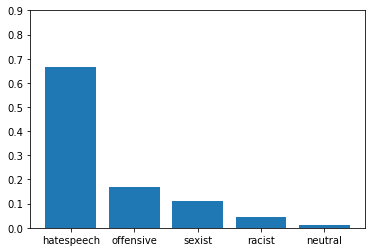

In [9]:
plt.bar(res["labels"], res["scores"])
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()

<AxesSubplot:xlabel='labels', ylabel='values'>

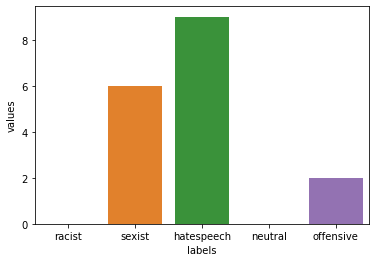

In [10]:
sns.barplot(data = df_frequency, x = 'labels', y = 'values')